In [10]:
import rioxarray as rxr
import geopandas as gpd
import pandas as pd
from hydrocivil.watersheds import RiverBasin

In [8]:
# Load basins
basins = gpd.read_file(r'data\basins.shp')

# Load domain-wide data
streams = gpd.read_file(r'data\streams.shp').set_crs(basins.crs)
dem = rxr.open_rasterio(r'data\ESA_COP30_UTM19S.tif', masked=True).squeeze()

In [ ]:
# Create for each basin a DEM and river network
basins_split = []
rivers = []
dems = []
for idx, row in basins.iterrows():
    basin = gpd.GeoDataFrame(row).T.set_geometry('geometry').set_crs(basins.crs)
    basins_split.append(basin)
    rivers.append(streams.clip(row.geometry))
    dems.append(dem.rio.clip(gpd.GeoSeries(row.geometry)))

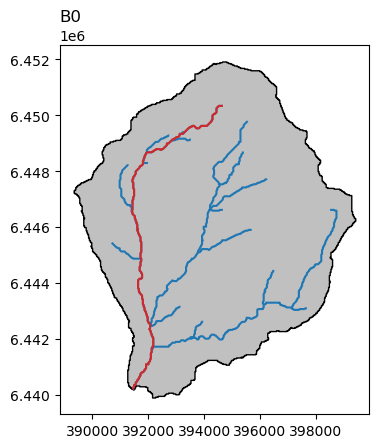

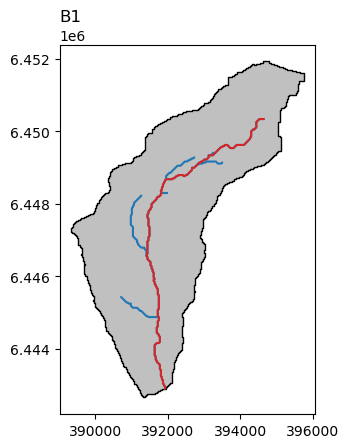

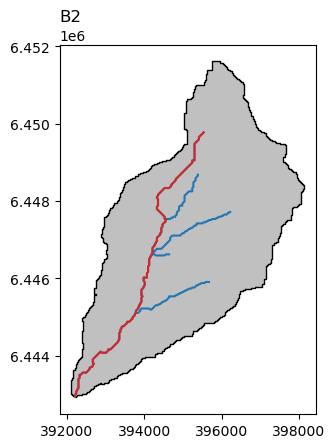

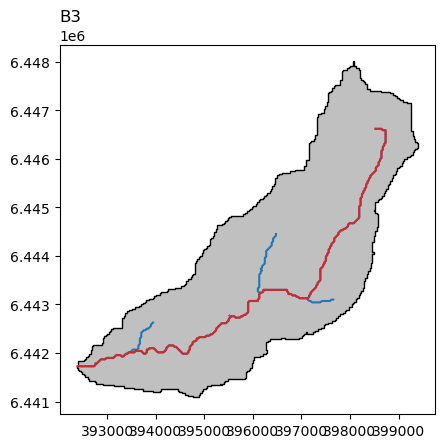

In [19]:
# Create hydrocivil watershed objects
geoparams = []
for name, basin, river, dem in zip(basins['Names'],basins_split, rivers, dems):
    wshed = RiverBasin(name, basin, river, dem)
    wshed = wshed.compute_params()
    wshed.plot() # Plot each basin
    
    geoparams.append(wshed.params)
geoparams = pd.concat(geoparams, axis=1)

In [20]:
geoparams

,B0,B1,B2,B3
outlet_x,391596.082,391823.499,392278.331,392490.586
outlet_y,6440253.04,6443027.518,6443042.679,6441678.181
centroid_x,394267.500646,392177.213208,395124.338744,396383.633338
centroid_y,6446049.696138,6447657.47862,6447123.572793,6443952.432212
area,74.890582,24.381877,25.29769,18.661319
perim,46.667493,32.369854,30.368185,28.480896
out2centroidlen,6.382609,4.643452,4.975284,4.508662
hmin,3054.36377,3190.486572,3226.694824,3160.266602
hmax,6171.356445,6171.356445,6110.597656,5981.99707
hmean,4444.317383,4427.57959,4751.121094,4392.53125
